# Reto Pokemon by @jasonssdev

## Importar Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Path


In [11]:
# Project root directory
project_root = Path().resolve().parent.parent.parent
pokemon_data_path = project_root / "retos" / "reto-pokemon-jasonssdev" / "data" / "all_pokemon_data.csv"

## Cargar Dataset

In [15]:
df_pokemon = pd.read_csv(pokemon_data_path)

## Preguntas

## 🔹 Nivel Low (Básico)

### Pregunta 1: ¿Cuántos pokemones hay en total?

In [24]:

print("Especies únicas de Pokémon según la Pokédex nacional:", df_pokemon['National Dex #'].nunique())

Especies únicas de Pokémon según la Pokédex nacional: 1025


### Pregunta 2: ¿Cuáles son los 5 tipos más comunes (columna `Primary Typing`)?

In [25]:
df_pokemon['Primary Typing'].value_counts().head(5)

Primary Typing
water     145
normal    128
grass     113
bug        89
fire       77
Name: count, dtype: int64

### Pregunta 3: ¿Cuál es el promedio de Velocidad `(Speed)` de todos los pokemones?

In [27]:
df_pokemon['Speed'].mean()

np.float64(69.72888513513513)

## 🔸 Nivel Medium (Intermedio)

### Pregunta 4: ¿Cuál es la correlación entre las estadísticas `Attack`, `Defense` y `Speed`? Muestra un heatmap.

In [28]:
# Configuración general de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

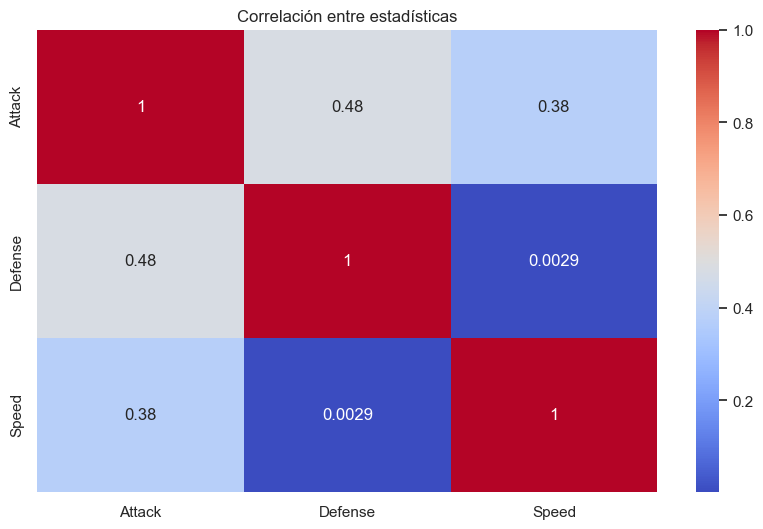

In [29]:
stats_df = df_pokemon[['Attack', 'Defense', 'Speed']]
sns.heatmap(stats_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre estadísticas")
plt.show()

### Pregunta 5: ¿Qué tipo (`Primary Typing`) tiene el mayor promedio de `Attack`?

In [30]:
df_pokemon.groupby('Primary Typing')['Attack'].mean().sort_values(ascending=False).head(1)

Primary Typing
dragon    105.979167
Name: Attack, dtype: float64

### Pregunta 6: Crear un histograma de la variable `Speed`

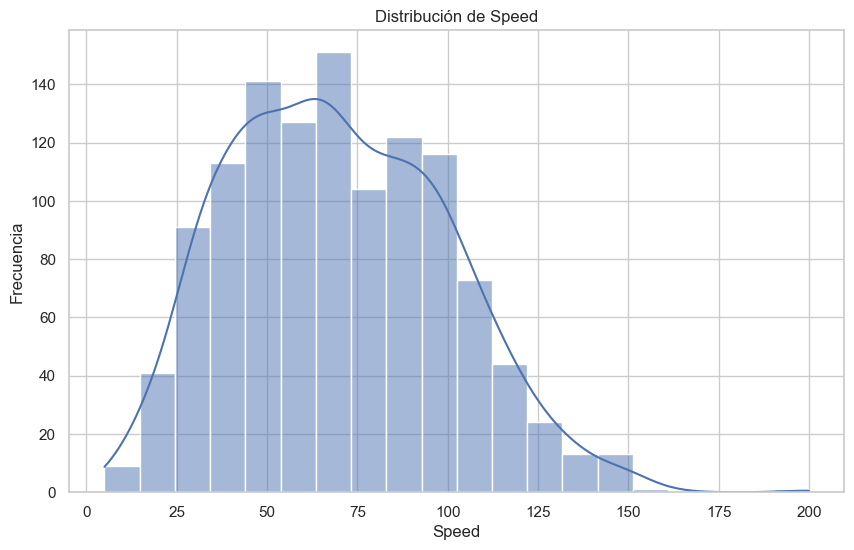

In [31]:
sns.histplot(df_pokemon['Speed'], bins=20, kde=True)
plt.title("Distribución de Speed")
plt.xlabel("Speed")
plt.ylabel("Frecuencia")
plt.show()

## 🔺 Nivel High (Avanzado)

### Pregunta 7: ¿Qué pokemones tienen estadísticas totales (`Base Stat Total`) superiores al percentil 90? ¿Qué tipos predominan en este grupo?

In [35]:
high_total = df_pokemon[df_pokemon['Base Stat Total'] > df_pokemon['Base Stat Total'].quantile(0.9)]
high_total['Primary Typing'].value_counts()

Primary Typing
dragon      22
psychic     21
water       10
steel       10
normal       7
fire         6
grass        5
rock         5
dark         5
fighting     5
bug          4
electric     3
ground       3
fairy        3
ghost        2
poison       2
Name: count, dtype: int64

### Pregunta 8: Clasifica a los pokemones en tres categorías según su `Base Stat Total`: "Débil", "Normal" y "Fuerte". Luego, muestra la distribución de estas categorías en un gráfico de barras.

In [36]:
def clasificar_pokemon(total):
    if total < 400:
        return "Débil"
    elif total < 600:
        return "Normal"
    else:
        return "Fuerte"

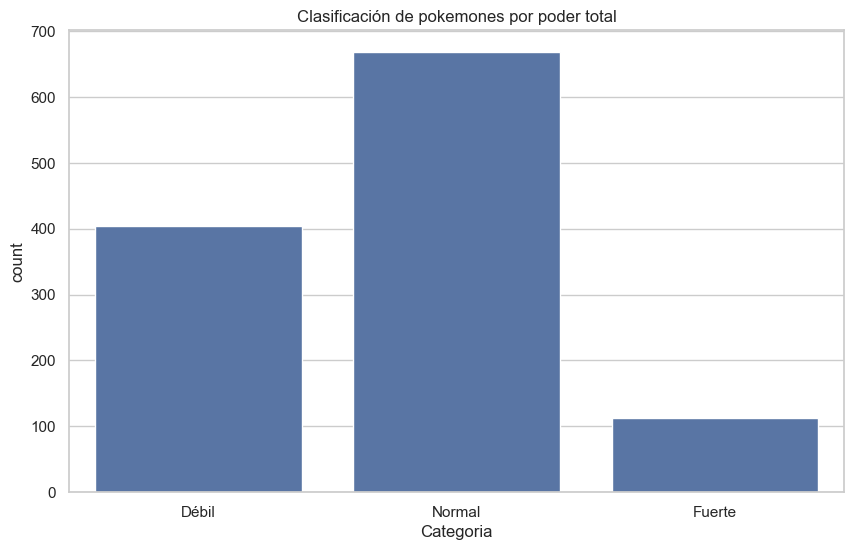

In [38]:
df_pokemon['Categoria'] = df_pokemon['Base Stat Total'].apply(clasificar_pokemon)
sns.countplot(data=df_pokemon, x='Categoria', order=['Débil', 'Normal', 'Fuerte'])
plt.title("Clasificación de pokemones por poder total")
plt.show()

### Pregunta 9: Crear un pairplot de `Attack`, `Defense`, `Speed` y colorear por `Legendary`

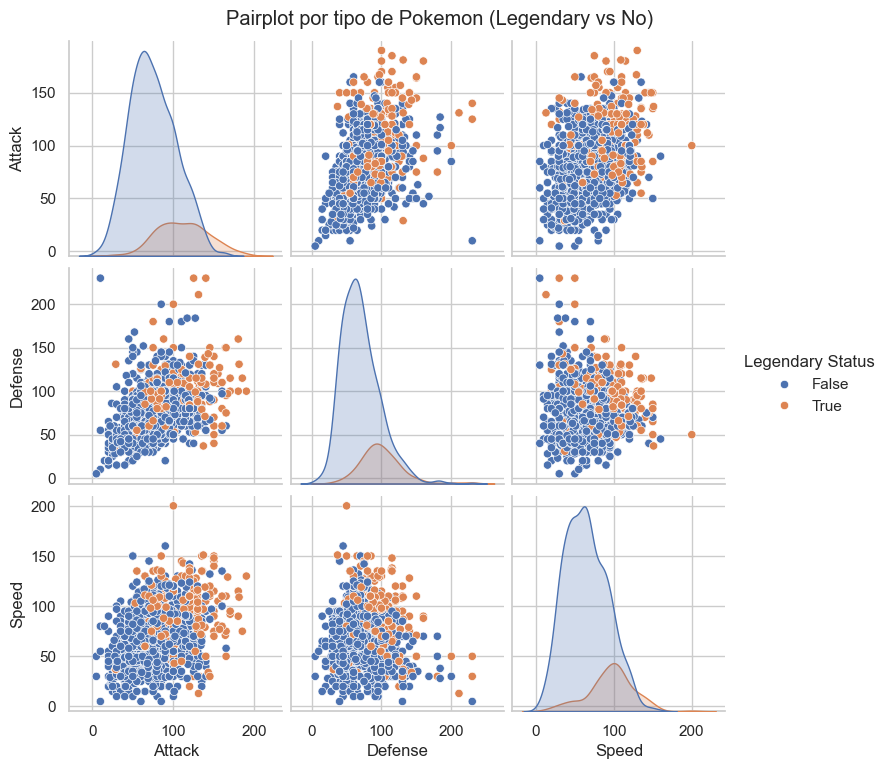

In [40]:
sns.pairplot(df_pokemon, vars=['Attack', 'Defense', 'Speed'], hue='Legendary Status')
plt.suptitle("Pairplot por tipo de Pokemon (Legendary vs No)", y=1.02)
plt.show()